# Install packages 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Setting to make numbers easier to read on display
pd.options.display.float_format = '{:20.2f}'.format

# Show all columns on output
pd.set_option('display.max_columns', 999)

# Importing excel data set and do some data exploration
? what if i want to connect to a dwh query?

In [26]:
df = pd.read_excel('online_retail_II.xlsx', sheet_name= 0)
# Reading data from excel file and storing it in dataframe df. Only read sheet 0.
# What is next? Reading the other sheet and merging them.

In [27]:
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.00,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.00,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.00,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.00,United Kingdom


In [28]:
df.info()
# Checking data types and non-null counts. We expect the count of each column to be 541909 as per the data source description.
# We can see that there are some missing values in the columns Customer ID and Description.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [29]:
df.describe()
# Automatically shows only numerical columns.
# Getting a statistical summary of the numerical columns in the dataframe.
# We can see that there are some negative values in the Quantity and Price columns which we need to investigate further.

,Quantity,InvoiceDate,Price,Customer ID
count,525461.00,525461,525461.00,417534.00
mean,10.34,2010-06-28 11:37:36.845017856,4.69,15360.65
min,-9600.00,2009-12-01 07:45:00,-53594.36,12346.00
25%,1.00,2010-03-21 12:20:00,1.25,13983.00
50%,3.00,2010-07-06 09:51:00,2.10,15311.00
75%,10.00,2010-10-15 12:45:00,4.21,16799.00
max,19152.00,2010-12-09 20:01:00,25111.09,18287.00
std,107.42,NaN,146.13,1680.81


In [30]:
# To include all the OBJECT columns in the output of describe method. Object is string type in pandas.
df.describe(include='O')

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [31]:
df[df["Customer ID"].isna()].head(10)
# Checking the rows with missing Customer ID values. We can see that these are mostly transactions with negative Quantity values which indicates that these are probably returns.]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


In [32]:
df[df["Quantity"] < 0].head(10)
# Checking the rows with negative Quantity values. We can see that these are mostly transactions with missing Customer ID values which indicates that these are probably returns.

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.00,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.00,United Kingdom


C means Cancelation here. Check the data description.
So, we actually want to check if the Invoice Code only contains the C and 6 digits, or it also contains other characters. Dont just blindly believe in the docu, duh.
To do it, the first step is to convert Invoice Id into str.

In [33]:
df["Invoice"] = df["Invoice"].astype(str)
# Convert Invoice column to string type to check its format.
df["Invoice"].str.match(r'^C\d{6}$').all()
# Check if all Invoice values match the pattern of starting with 'C' followed by exactly 6 digits.
# The result is False, indicating that there are Invoice values that do not match this pattern.

np.False_

So.. what can it be?? if not C, then what? 
We would want to use unique to see all the possible options.

In [34]:
df["Invoice"].str.replace("[0-9]", "", regex=True).unique()
# We see there are Invoice which starts with A. Let's check what it is.

array(['', 'C', 'A'], dtype=object)

In [35]:
df[df["Invoice"].str.startswith('A')].head(10)
# Checking the rows with Invoice starting with 'A'. Only 3 rows found.
# We can see in the Description column that these are transactions related to adjustments or corrections to previous invoices.

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


Since this information is irrelevant to our goal of customer segmentation, we can delete these three rows.

In [36]:
df["StockCode"] = df["StockCode"].astype(str)
# Convert StockCode column to string type to check its format.

In [37]:
df["StockCode"].str.match(r'^\d{5}$').all()
# Check if all StockCode values match the pattern of exactly 5 digits as in the docu.
# The result is False, indicating that there are StockCode values that do not match this pattern.
# Let's take a look at some samples

np.False_

In [38]:
df[df["StockCode"].str.match(r'^\d{5}$') == False].head(10)
# Checking the rows with StockCode values that do not match the pattern of exactly 5 digits

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
12,489436,48173C,DOOR MAT BLACK FLOCK,10,2009-12-01 09:06:00,5.95,13078.00,United Kingdom
23,489436,35004B,SET OF 3 BLACK FLYING DUCKS,12,2009-12-01 09:06:00,4.65,13078.00,United Kingdom
28,489436,84596F,SMALL MARSHMALLOWS PINK BOWL,8,2009-12-01 09:06:00,1.25,13078.00,United Kingdom
29,489436,84596L,BISCUITS SMALL BOWL LIGHT BLUE,8,2009-12-01 09:06:00,1.25,13078.00,United Kingdom
42,489437,84507B,STRIPES DESIGN MONKEY DOLL,6,2009-12-01 09:08:00,2.55,15362.00,United Kingdom
46,489437,84970S,HANGING HEART ZINC T-LIGHT HOLDER,12,2009-12-01 09:08:00,0.85,15362.00,United Kingdom
61,489438,84031A,CHARLIE+LOLA RED HOT WATER BOTTLE,56,2009-12-01 09:24:00,3.00,18102.00,United Kingdom
62,489438,84031B,CHARLIE LOLA BLUE HOT WATER BOTTLE,56,2009-12-01 09:24:00,3.00,18102.00,United Kingdom


In [39]:
df[(df["StockCode"].str.match(r'^\d{5}$') == False) & (df["StockCode"].str.match("^\d{5}[a-zA-Z]+$") == False)]["StockCode"].unique()
# Checking the StockCode values that DO NOT match the pattern of exactly 5 digits or 5 digits followed by letters.
# We can see that there are StockCode values like 'POST', 'D', 'M', 'S', 'BANK CHARGES', 'DOT', 'PADS', 'CRUK', 'AMAZONFEE', etc.

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

We have many questions, and this list doesn't include any documented values. This means we have to look closely at each code to make an assumption.

In [40]:
df[df["StockCode"].str.contains("POST") | df["StockCode"].str.contains("DOT")].head(10)
# example checking rows with StockCode containing 'POST' or 'DOT'

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.00,12682.00,France
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.00,12636.00,USA
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.00,12362.00,Belgium
625,489526,POST,POSTAGE,6,2009-12-01 11:50:00,18.00,12533.00,Germany
927,C489538,POST,POSTAGE,-1,2009-12-01 12:18:00,9.58,15796.00,United Kingdom
1244,489557,POST,POSTAGE,4,2009-12-01 12:52:00,18.00,12490.00,France
2379,489597,DOT,DOTCOM POSTAGE,1,2009-12-01 14:28:00,647.19,NaN,United Kingdom
2539,489600,DOT,DOTCOM POSTAGE,1,2009-12-01 14:43:00,55.96,NaN,United Kingdom
2551,489601,DOT,DOTCOM POSTAGE,1,2009-12-01 14:44:00,68.39,NaN,United Kingdom
2571,489602,DOT,DOTCOM POSTAGE,1,2009-12-01 14:45:00,59.35,NaN,United Kingdom


## Stock Code Results
which i copied from the autor directly
Source: https://www.youtube.com/watch?v=afPJeQuVeuY

| Code         | Description                                                                 | Action                   |
|--------------|-----------------------------------------------------------------------------|--------------------------|
| DCGS         | Looks valid, some quantities are negative though and customer ID is null     | Exclude from clustering  |
| D            | Looks valid, represents discount values                                     | Exclude from clustering  |
| DOT          | Looks valid, represents postage charges                                     | Exclude from clustering  |
| M or m       | Looks valid, represents manual transactions                                 | Exclude from clustering  |
| C2           | Carriage transaction - not sure what this means                             | Exclude from clustering  |
| C3           | Not sure, only 1 transaction                                                | Exclude from clustering  |
| BANK CHARGES or B | Bank charges                                                           | Exclude from clustering  |
| S            | Samples sent to customer                                                    | Exclude from clustering  |
| TESTXXX      | Testing data, not valid                                                     | Exclude from clustering  |
| gift__XXX    | Purchases with gift cards, might be interesting for another analysis, but no customer data | Exclude         |
| PADS         | Looks like a legit stock code for padding                                   | Include                  |
| SP1002       | Looks like a special request item, only 2 transactions, 3 look legit, 1 has 0 pricing | Exclude for now  |
| AMAZONFEE    | Looks like fees for Amazon shipping or something                            | Exclude for now          |
| ADJUSTX      | Looks like manual account adjustments by admins                             | Exclude for now          |

In a real-world situation, this is where I will talk to a colleague and ask for more information to decide whether to keep the data or not.

# Data Cleaning

We will use a variable called mask for the cleaning part. 

In [ ]:
cleaned_df = df.copy()
# Create a copy of the original dataframe to perform cleaning operations on.

cleaned_df["Invoice"] = cleaned_df["Invoice"].astype(str)
# Convert Invoice column to string type.
mask = (
    # Invoice should be exactly 6 digits
    # cleaned_df["Invoice"].str.match("^\d{6}$")  # This variation contains NaN values
    cleaned_df["Invoice"].str.match("^\d{6}$") == True  # This variation does not contain NaN values
)

cleaned_df = cleaned_df[mask]
# Apply the mask to filter the dataframe and keep only the rows that match the criteria.

In [42]:
cleaned_df["StockCode"] = cleaned_df["StockCode"].astype(str)
# Convert StockCode column to string type.

mask = ( 
    (cleaned_df["StockCode"].str.match("^\\d{5}$") == True)
    # Include StockCode with 5 digits.
    | (cleaned_df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == True)
    # Include StockCode with 5 digits followed by letters.
    | (cleaned_df["StockCode"].str.match("^PADS$") == True)
    # Include StockCode 'PADS' which is valid as per the docu in data exploration.
)
cleaned_df = cleaned_df[mask]
# Apply the mask to filter the dataframe and keep only the rows that match the criteria.

Check each column and use the "cleaned_df.describe()" function to see how the dataframe is doing. 

In [43]:
# We can argue that we wan to treat Na in Customer ID as a separate segment. But for this exercise, we will exclude them.
cleaned_df.dropna(subset=["Customer ID"], inplace=True)
# Drop rows with missing Customer ID values.

In [44]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406337.00,406337,406337.00,406337.00
mean,13.62,2010-07-01 10:11:06.543288320,2.99,15373.63
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-26 14:01:00,1.25,14004.00
50%,5.00,2010-07-09 15:48:00,1.95,15326.00
75%,12.00,2010-10-14 17:09:00,3.75,16814.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00
std,97.00,NaN,4.29,1677.37


There are some outliers here. Is it possible for price to be zero? I would ask the salesperson for more information, but there is no salesperson here. The maximum amount looks unusual to me. I'll also look into that.

In [ ]:
# let´s take a lok at the Price column
cleaned_df[cleaned_df["Price"]==0]["Price"].count()
# There are 28 rows with Price equal to zero. No pain to kill them.
cleaned_df = cleaned_df[cleaned_df["Price"] > 0]
# if we use the describe function again, we can see that there are some orders with price == 0.001. 
# We can keep them in this case but in real life, I would check the min(price) of our sortiment to have a better filter.

In [ ]:
# to sum up, we will take a look at how much data we have lost during the cleaning process.
len(cleaned_df)/len(df)
# len() counts the number of rows in the dataframe, inclusive NaN values! 
# we still have 77.3% of the original data after cleaning. Cant say if its good or bad without knowing the context of the data.

0.7732429238325965

# Feature Engineering
aka data transforming  
Reminder: Frequency, Recency, Monetary

In [50]:
cleaned_df["SalesLineTotal"] = cleaned_df["Quantity"] * cleaned_df["Price"]

cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesLineTotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,7.50


In [51]:
aggregated_df = cleaned_df.groupby("Customer ID", as_index=False)\
    .agg(
    MonetaryValue = ("SalesLineTotal", "sum"), # total amount spent by the customer
    Frequency = ("Invoice", "nunique"), # number of unique invoices (orders) placed by the customer
    LastInvoideDate = ("InvoiceDate", "max") # date of the most recent invoice
    )
aggregated_df.head(5)

,Customer ID,MonetaryValue,Frequency,LastInvoideDate
0,12346.00,169.36,2,2010-06-28 13:53:00
1,12347.00,1323.32,2,2010-12-07 14:57:00
2,12348.00,221.16,1,2010-09-27 14:59:00
3,12349.00,2221.14,2,2010-10-28 08:23:00
4,12351.00,300.93,1,2010-11-29 15:23:00


In [53]:
max_invoice_date = cleaned_df["InvoiceDate"].max()
# Calculate the maximum invoice date in the cleaned dataframe.
max_invoice_date
#2010-12-09
# This date will be used instead of today´s date to calculate recency. This is because the dataset is historical and we want to avoid biasing the recency calculation with today´s date.

Timestamp('2010-12-09 20:01:00')

In [54]:
aggregated_df["Recency"] = (max_invoice_date - aggregated_df["LastInvoideDate"]).dt.days
# Calculate Recency as the number of days since the last invoice date for each customer. Dt as date-time.
aggregated_df.head(5)

,Customer ID,MonetaryValue,Frequency,LastInvoideDate,Recency
0,12346.00,169.36,2,2010-06-28 13:53:00,164
1,12347.00,1323.32,2,2010-12-07 14:57:00,2
2,12348.00,221.16,1,2010-09-27 14:59:00,73
3,12349.00,2221.14,2,2010-10-28 08:23:00,42
4,12351.00,300.93,1,2010-11-29 15:23:00,10


## Dealing with ourliers
Plotting data points to detect outliers

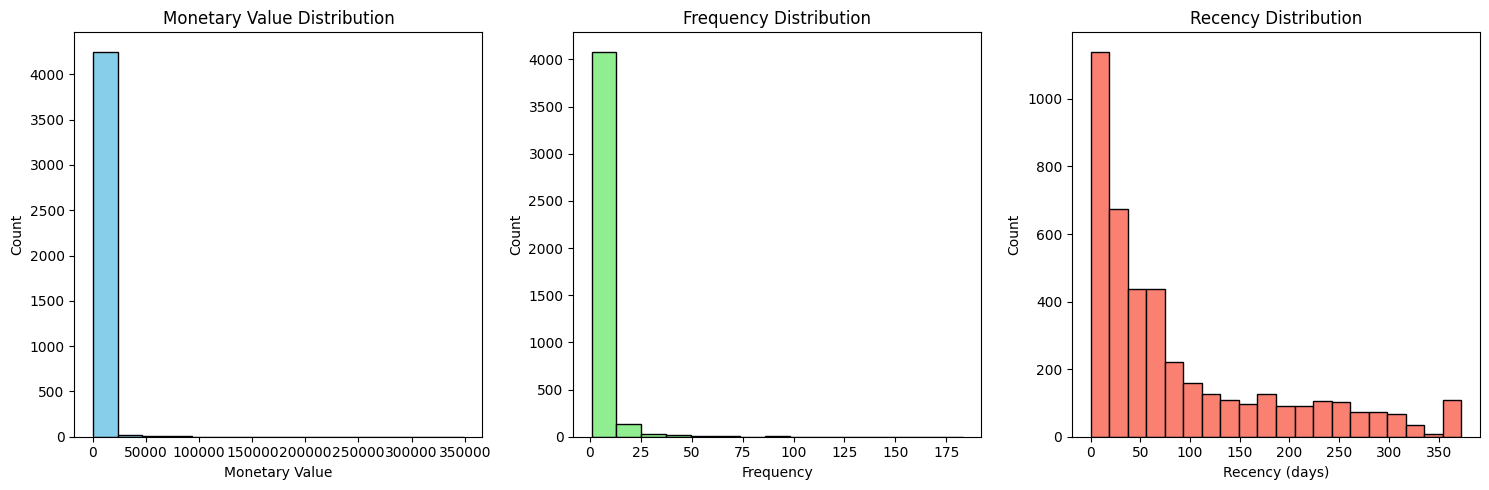

In [ ]:
plt.figure(figsize=(15, 5))
# I made a mistake here. Figure in steadt of figure. The histograms were squished together.

plt.subplot(1, 3, 1)
# Create a subplot for Monetary Value distribution
plt.hist(aggregated_df["MonetaryValue"], bins=15, color='skyblue', edgecolor='black')
# Plot a histogram of the Monetary Value column with 10 bins, sky blue color, and black edges.
plt.title("Monetary Value Distribution")
# Set the title of the plot.
plt.xlabel("Monetary Value")
# Set the x-axis label.
plt.ylabel("Count")
# Set the y-axis label.

plt.subplot(1, 3, 2)
# Create a subplot for Frequency distribution
plt.hist(aggregated_df["Frequency"], bins=15, color='lightgreen', edgecolor='black')
# Plot a histogram of the Frequency column with 10 bins, light green color, and black edges.
plt.title("Frequency Distribution")
# Set the title of the plot.
plt.xlabel("Frequency")
# Set the x-axis label.
plt.ylabel("Count")

plt.subplot(1, 3, 3)
# Create a subplot for Recency distribution
plt.hist(aggregated_df["Recency"], bins=20, color='salmon', edgecolor='black')
# Plot a histogram of the Recency column with 20 bins, salmon color, and black edges.
plt.title("Recency Distribution")
# Set the title of the plot.
plt.xlabel("Recency (days)")
# Set the x-axis label.
plt.ylabel("Count")

plt.tight_layout()
# Adjust the layout to prevent overlap
plt.show()


# As we see in the histograms, the distributions of Monetary Value, Frequency, and Recency are all right-skewed. It is more right-skewed for Monetary Value and Frequency, which is normal.
# In e-commerce, it is common to have a few customers who spend significantly more than the average customer, leading to a right-skewed distribution.
# Similarly, a small number of customers may make frequent purchases, while the majority make infrequent purchases.
# Recency is also right-skewed, indicating that most customers have made recent purchases, while a smaller number of customers have not made purchases in a long time. I would normally contact a sales person to understand the business context better.


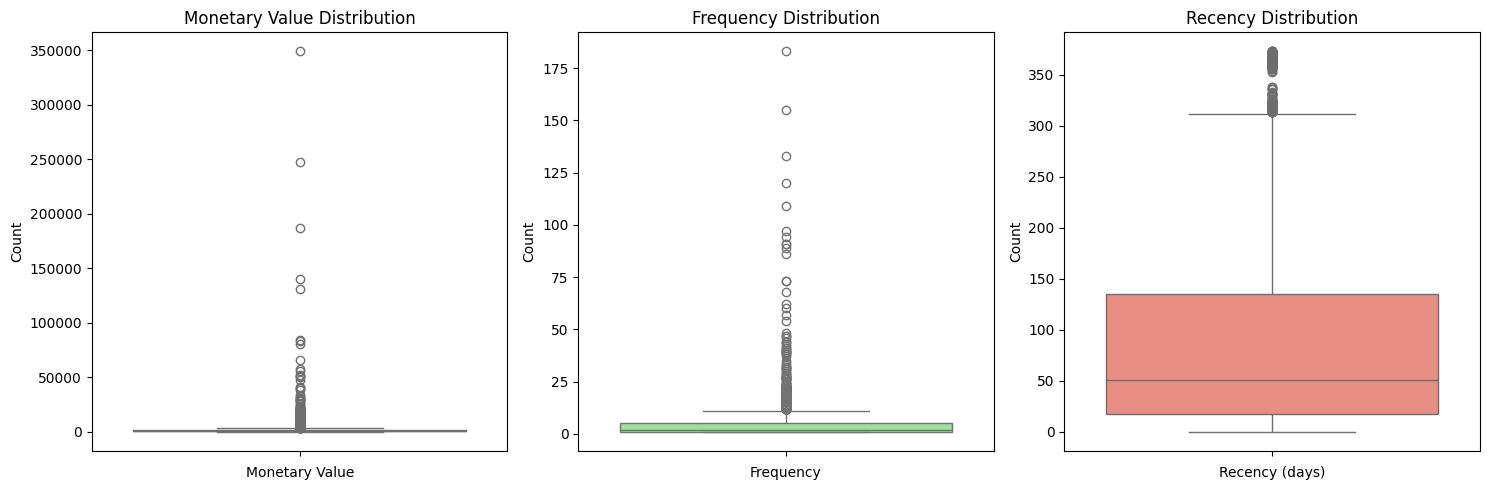

In [62]:
# Using Box plots to detect outliers in the data
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
# Create a subplot for Monetary Value distribution
sns.boxplot(data=aggregated_df["MonetaryValue"], color='skyblue')
# should not use x= aggregated_df["MonetaryValue"] here, as it is for horizontal boxplot
plt.title("Monetary Value Distribution")
# Set the title of the plot.
plt.xlabel("Monetary Value")
# Set the x-axis label.
plt.ylabel("Count")
# Set the y-axis label.

plt.subplot(1, 3, 2)
# Create a subplot for Frequency distribution
sns.boxplot(data=aggregated_df["Frequency"], color='lightgreen')
plt.title("Frequency Distribution")
# Set the title of the plot.
plt.xlabel("Frequency")
# Set the x-axis label.
plt.ylabel("Count")

plt.subplot(1, 3, 3)
# Create a subplot for Recency distribution
sns.boxplot(data=aggregated_df["Recency"], color='salmon')
plt.title("Recency Distribution")
# Set the title of the plot.
plt.xlabel("Recency (days)")
# Set the x-axis label.
plt.ylabel("Count")

plt.tight_layout()
# Adjust the layout to prevent overlap
plt.show()


I recommend reading about the definition of outliers in statistics here. Also, read about the interpretation of boxplot graphics. <br> It is recommended that we keep the outliers because they are valuable customers that we want to retain. However, they should be separated because their statistics can greatly affect those of normal customers.

In [63]:
# Defining variables to separate outliers from normal customers
M_Q1 = aggregated_df["MonetaryValue"].quantile(0.25)
# fixed value at 25th percentile
M_Q3 = aggregated_df["MonetaryValue"].quantile(0.75)
# fixed value at 75th percentile
M_IQR = M_Q3 - M_Q1
# Interquartile range (IQR) is the difference between the 75th and 25th percentiles. 

monetary_outlier_df = aggregated_df[(aggregated_df["MonetaryValue"] < (M_Q1 - 1.5 * M_IQR)) | (aggregated_df["MonetaryValue"] > (M_Q3 + 1.5 * M_IQR))].copy()
# Identify outliers in the Monetary Value column based on the IQR method.
# Use .copy() whenever you’re making a filtered DataFrame that you plan to work with independently.

monetary_outlier_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoideDate,Recency
count,423.00,423.00,423.00,423,423.00
mean,15103.04,12188.10,17.17,2010-11-09 12:26:02.978723328,30.04
min,12357.00,3802.04,1.00,2009-12-10 18:03:00,0.00
25%,13622.00,4605.94,8.00,2010-11-08 13:17:30,3.00
50%,14961.00,6191.32,12.00,2010-11-26 12:19:00,13.00
75%,16692.00,10273.24,18.00,2010-12-06 10:34:30,31.00
max,18260.00,349164.35,183.00,2010-12-09 19:32:00,364.00
std,1728.66,25830.85,19.73,NaN,51.54


In [64]:
# Frequency outliers
F_Q1 = aggregated_df["Frequency"].quantile(0.25)
F_Q3 = aggregated_df["Frequency"].quantile(0.75)
F_IQR = F_Q3 - F_Q1

frequency_outlier_df = aggregated_df[(aggregated_df["Frequency"] < (F_Q1 - 1.5 * F_IQR)) | (aggregated_df["Frequency"] > (F_Q3 + 1.5 * F_IQR))].copy()

frequency_outlier_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoideDate,Recency
count,279.00,279.00,279.00,279,279.00
mean,15352.66,14409.71,23.81,2010-11-23 11:06:20.645161216,16.09
min,12437.00,1094.39,12.00,2010-05-12 16:51:00,0.00
25%,13800.00,4331.56,13.00,2010-11-20 13:14:30,2.00
50%,15465.00,6615.77,17.00,2010-12-02 10:46:00,7.00
75%,16828.50,11692.41,23.00,2010-12-07 11:08:30,19.00
max,18260.00,349164.35,183.00,2010-12-09 19:32:00,211.00
std,1748.43,31381.74,21.93,NaN,26.59


## Normal customers aka non-outliers

In [ ]:
non_outlier_df = aggregated_df[(~aggregated_df.index.isin(monetary_outlier_df.index)) & (~aggregated_df.index.isin(frequency_outlier_df.index))].copy()
# data from aggregated_df that are not in either monetary_outlier_df or frequency_outlier_df.
non_outlier_df.describe()
# we notice that the values in columns MonetaryValue and Frequency are significantly harmozied after removing the outliers.

,Customer ID,MonetaryValue,Frequency,LastInvoideDate,Recency
count,3809.00,3809.00,3809.00,3809,3809.00
mean,15376.48,885.50,2.86,2010-09-03 11:16:46.516146176,97.08
min,12346.00,1.55,1.00,2009-12-01 10:49:00,0.00
25%,13912.00,279.91,1.00,2010-07-08 14:48:00,22.00
50%,15389.00,588.05,2.00,2010-10-12 16:25:00,58.00
75%,16854.00,1269.05,4.00,2010-11-17 13:14:00,154.00
max,18287.00,3788.21,11.00,2010-12-09 20:01:00,373.00
std,1693.20,817.67,2.24,NaN,98.11


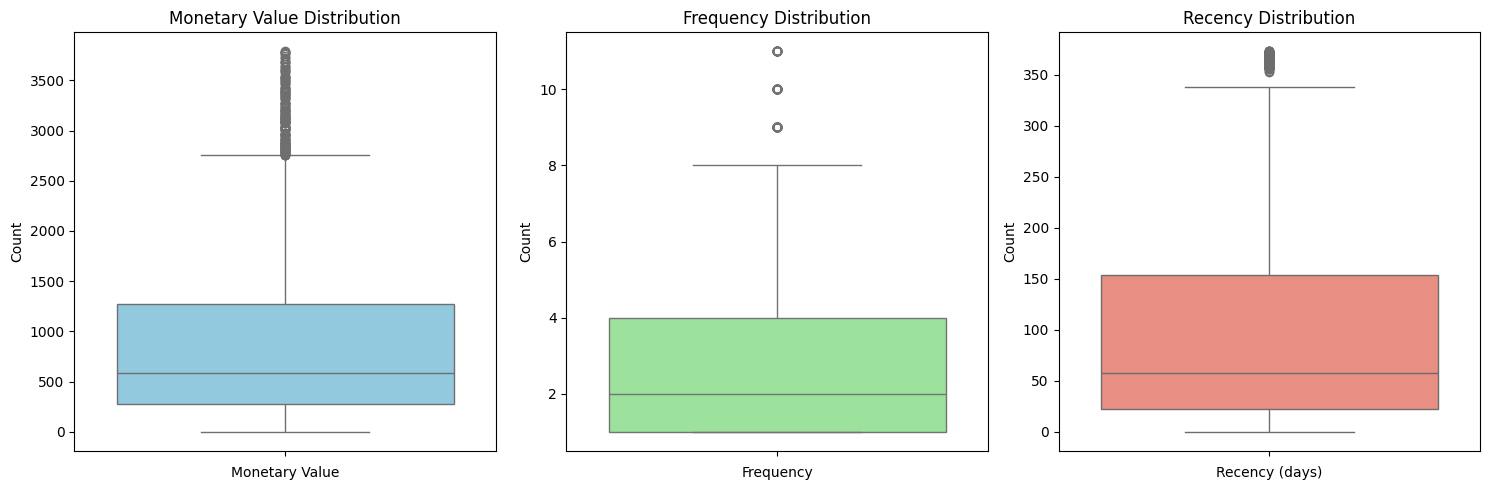

In [67]:
# Using Box plots to detect outliers in the data
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
# Create a subplot for Monetary Value distribution
sns.boxplot(data=non_outlier_df["MonetaryValue"], color='skyblue')
# should not use x= aggregated_df["MonetaryValue"] here, as it is for horizontal boxplot
plt.title("Monetary Value Distribution")
# Set the title of the plot.
plt.xlabel("Monetary Value")
# Set the x-axis label.
plt.ylabel("Count")
# Set the y-axis label.

plt.subplot(1, 3, 2)
# Create a subplot for Frequency distribution
sns.boxplot(data=non_outlier_df["Frequency"], color='lightgreen')
plt.title("Frequency Distribution")
# Set the title of the plot.
plt.xlabel("Frequency")
# Set the x-axis label.
plt.ylabel("Count")

plt.subplot(1, 3, 3)
# Create a subplot for Recency distribution
sns.boxplot(data=non_outlier_df["Recency"], color='salmon')
plt.title("Recency Distribution")
# Set the title of the plot.
plt.xlabel("Recency (days)")
# Set the x-axis label.
plt.ylabel("Count")

plt.tight_layout()
# Adjust the layout to prevent overlap
plt.show()

We can now view the data frame as a 3D graphic to see how the points are arranged. 

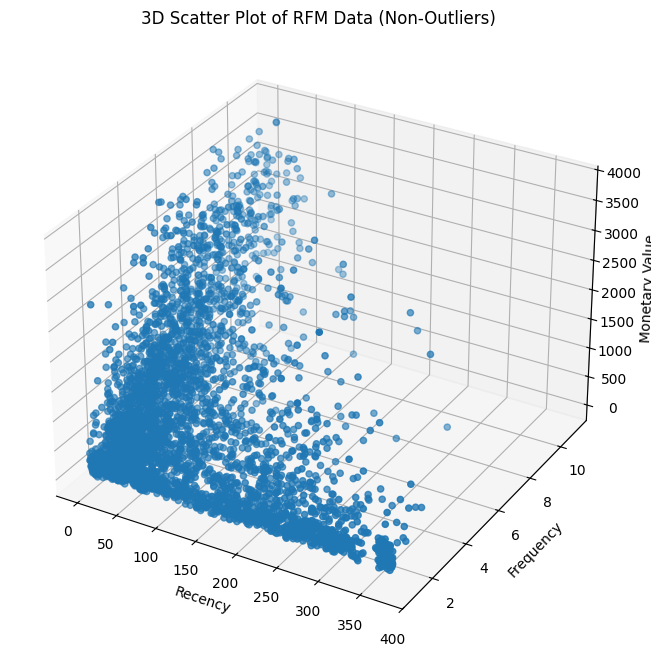

In [68]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(non_outlier_df["Recency"], non_outlier_df["Frequency"], non_outlier_df["MonetaryValue"])

ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetary Value")

ax.set_title("3D Scatter Plot of RFM Data (Non-Outliers)")

plt.show()


Each axis uses a different scale, and since the K-Means algorithm is sensitive to input scaling, we need to normalize the data so that all measurements are on the same scale.

Arts of scaling. Content need to be checked:  
- Min–Max → when you want all features in [0,1].
- Standardization (Z-Score) → default, good for K-Means, PCA, regression.
- Robust Scaling → when you have outliers.
- MaxAbs → for sparse high-dimensional data.
- Log / Power → for skewed data.
- Unit Vector → for text / distance-based similarity.

z scaling: Centers data at mean = 0 with standard deviation = 1.  
Ensures that each feature contributes equally to the analysis. Note that we assumpt that the data is normal distributed :-/ which is almost never true.

In [71]:
scaler = StandardScaler()
# Create a StandardScaler object to standardize the data.

scaled_data = scaler.fit_transform(non_outlier_df[["Recency", "Frequency", "MonetaryValue"]])
scaled_data


array([[ 0.68214853, -0.38488934, -0.87594534],
       [-0.96925093, -0.38488934,  0.5355144 ],
       [-0.24548944, -0.83063076, -0.81258645],
       ...,
       [ 2.01753946, -0.83063076, -0.62197163],
       [ 0.14187587, -0.38488934,  0.44146683],
       [-0.81634357,  0.50659348,  1.72488781]], shape=(3809, 3))

In [72]:
type(scaled_data)
# scaled_data is a numpy array. We can convert it to a dataframe for better handling.

numpy.ndarray

In [ ]:
# we should set the index to the original index to keep track of the customers after scaling.
scaled_data_df = pd.DataFrame(scaled_data, columns=["Recency", "Frequency", "MonetaryValue"], index=non_outlier_df.index)
scaled_data_df
# If we scatter plot the scaled data, we will see that the scales of all three axes are now the same and there is no change in the distribution of the data.

,Recency,Frequency,MonetaryValue
0,0.68,-0.38,-0.88
1,-0.97,-0.38,0.54
2,-0.25,-0.83,-0.81
3,-0.56,-0.38,1.63
4,-0.89,-0.83,-0.72
...,...,...,...
4280,-0.82,1.40,-0.30
4281,-0.32,-0.83,-0.58
4282,2.02,-0.83,-0.62
4283,0.14,-0.38,0.44


# K-Means Clustering

The numbe of clusters = the number of centroids. We need to test to now which number is relevant.

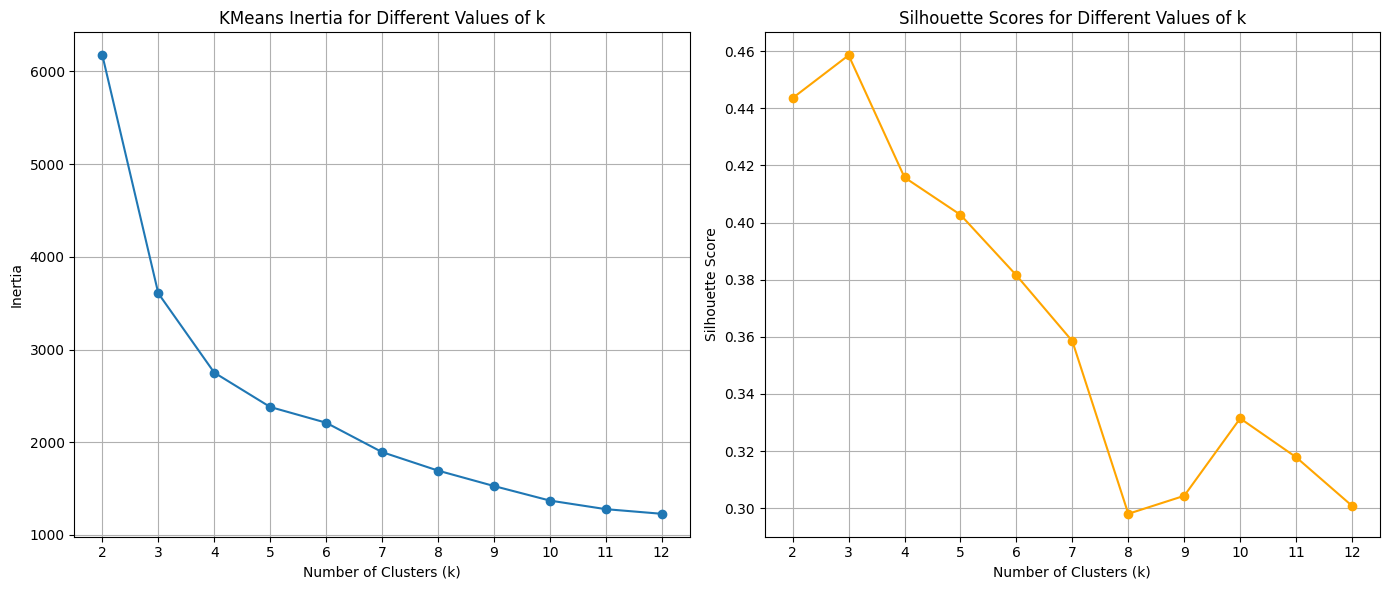

In [75]:
# defining the upper limit of how many clusters we want to test
max_k = 12 #free choice here.

inertia = [] # list to store inertia values for each k iteration
# Low inertia → points are close to their cluster centroid → clusters are tight and well-formed.
# High inertia → points are spread out → clusters are less compact.
# Note: inertia always decreases as you increase the number of clusters (k). With k = n (every point its own cluster), inertia = 0.

k_values = range(2, max_k + 1)

silhouette_scores = [] # list to store silhouette scores for each k iteration
# Silhouette score measures how similar an object is to its own cluster compared to other clusters.
# The silhouette score ranges from -1 to 1., a higher value indicates better-defined clusters.

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter = 1000)
    # Create a KMeans object with k clusters, a fixed random state for reproducibility, and a maximum of 1000 iterations.
    cluster_labels = kmeans.fit_predict(scaled_data_df)
    # Capturing the cluster labels to use them in silhouette score calculation
    # Fit the KMeans model to the scaled data and predict the cluster labels.
    sil_score = silhouette_score(scaled_data_df, cluster_labels)
    # Calculate the silhouette score for the current clustering.
    silhouette_scores.append(sil_score)
    inertia.append(kmeans.inertia_)
    # Append the inertia value for the current k to the inertia list.
    
    

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

We see that the inertia decreases as the number of clusters increases, which is expected. The elbow point appears to be around k = 4 or 5, where the rate of decrease in inertia starts to slow down.  
We need to check the silhouette score to make a better decision bewteen k = 4 or 5.
  
So we see that the silhouette score is highest for k = 4, indicating that the clusters are well-defined and separated at this value of k.
Therefore, we will choose k = 4 for our K-Means clustering.

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42, max_iter = 1000)
# Create a KMeans object with k = 4 clusters, a fixed random state for reproducibility, and a maximum of 1000 iterations.
cluster_labels = kmeans.fit_predict(scaled_data_df)
# Fit the KMeans model to the scaled data and predict the cluster labels.
cluster_labels
# which meand for each data point, a cluster with label 0, 1, 2, or 3 will be assigned.

array([1, 0, 2, ..., 1, 0, 0], shape=(3809,), dtype=int32)

In [77]:
non_outlier_df["Cluster"] = cluster_labels
# Adding the cluster labels to the non_outlier_df dataframe as a new column "Cluster".
non_outlier_df.head(10)

,Customer ID,MonetaryValue,Frequency,LastInvoideDate,Recency,Cluster
0,12346.00,169.36,2,2010-06-28 13:53:00,164,1
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.00,221.16,1,2010-09-27 14:59:00,73,2
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,0
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2
5,12352.00,343.80,2,2010-11-29 10:07:00,10,2
6,12353.00,317.76,1,2010-10-27 12:44:00,43,2
7,12355.00,488.21,1,2010-05-21 11:59:00,202,1
8,12356.00,3126.25,3,2010-11-24 12:24:00,15,3
10,12358.00,2519.01,3,2010-11-29 10:56:00,10,0


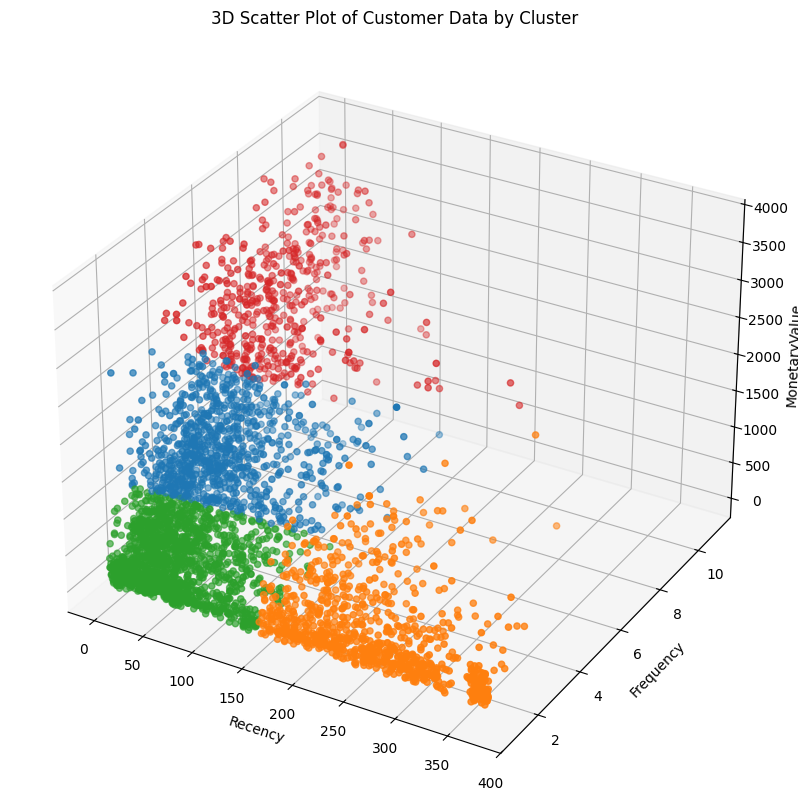

In [78]:
# I copy pasted the code for this graphic. Honestly i would use other tools to visualize data.
cluster_colors = {0: '#1f77b4',  # Blue
                  1: '#ff7f0e',  # Orange
                  2: '#2ca02c',  # Green
                  3: '#d62728'}  # Red

colors = non_outlier_df["Cluster"].map(cluster_colors)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(non_outlier_df["Recency"], 
                     non_outlier_df["Frequency"], 
                     non_outlier_df["MonetaryValue"], 
                     c=colors,  # Use mapped solid colors
                     marker='o')

ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("MonetaryValue")

ax.set_title("3D Scatter Plot of Customer Data by Cluster")

plt.show()

Now that we have our clusters, we need to give them meaningful names, since business users can relate more easily to descriptive labels than to numbers like 0, 1, 2, or 3. To choose appropriate names, we will use violin plots to visualize the characteristics of each cluster.

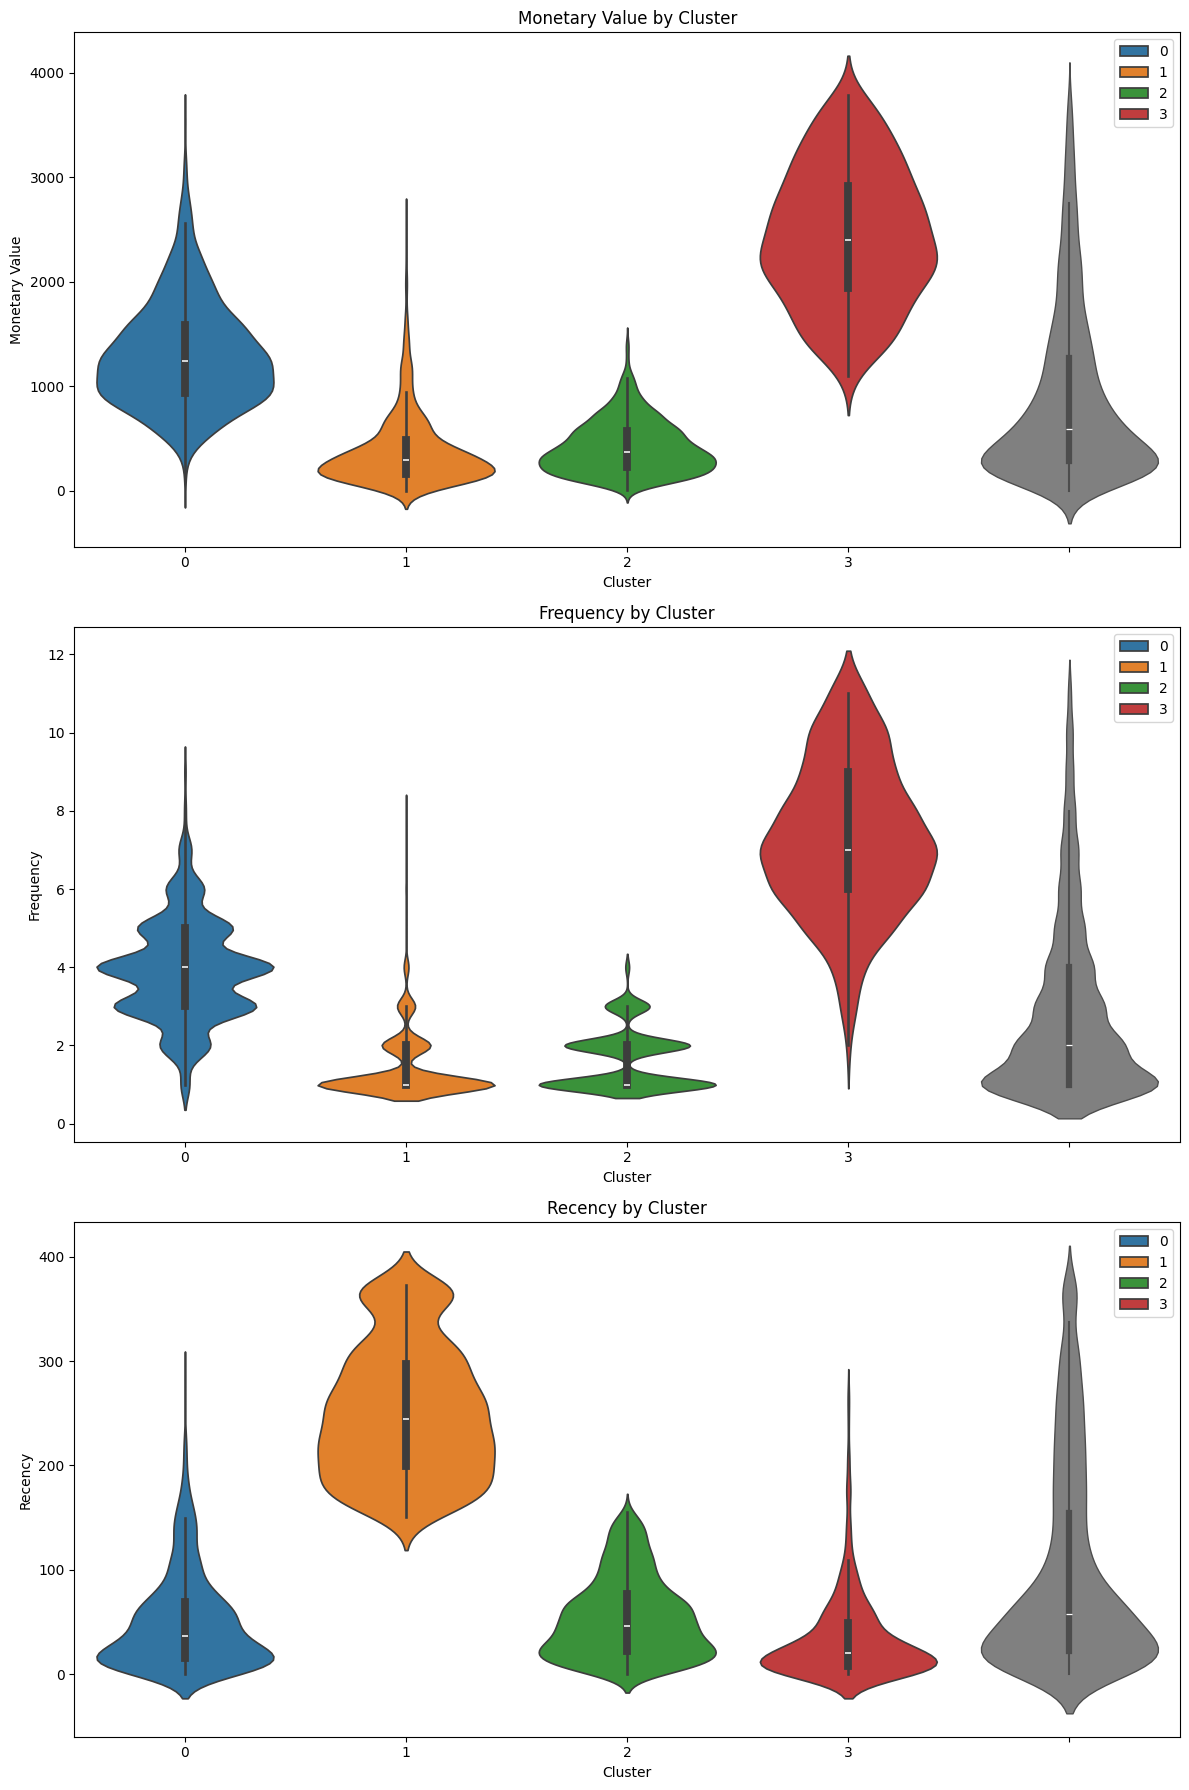

In [79]:
# I copied the graphic code again...
plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=non_outlier_df['Cluster'], y=non_outlier_df['MonetaryValue'], palette=cluster_colors, hue=non_outlier_df["Cluster"])
sns.violinplot(y=non_outlier_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=non_outlier_df['Cluster'], y=non_outlier_df['Frequency'], palette=cluster_colors, hue=non_outlier_df["Cluster"])
sns.violinplot(y=non_outlier_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')


plt.subplot(3, 1, 3)
sns.violinplot(x=non_outlier_df['Cluster'], y=non_outlier_df['Recency'], palette=cluster_colors, hue=non_outlier_df["Cluster"])
sns.violinplot(y=non_outlier_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

The gray shape shows the overall distribution across all clusters. To read the graphic, pick a cluster and compare its distribution with the others. For example, Cluster 0 has an average recency that is slightly below the overall mean. Its frequency is normally distributed, while its monetary value is above average. This suggests that these customers are valuable and should be retained -> A suitable action could be to introduce a loyalty program or provide incentives to increase engagement, ensuring that these customers remain active.

Gals and Guys and Gays, i copied the content from the tutor. No need to agree with him, it is just aabout naming Clusters. The actions must be adjusted to products or industry of the company.  

Cluster 0 (Blue): "Retain"
Rationale: This cluster represents high-value customers who purchase regularly, though not always very recently. The focus should be on retention efforts to maintain their loyalty and spending levels.
Action: Implement loyalty programs, personalized offers, and regular engagement to ensure they remain active.
Cluster 1 (Orange): "Re-Engage"
Rationale: This group includes lower-value, infrequent buyers who haven’t purchased recently. The focus should be on re-engagement to bring them back into active purchasing behavior.
Action: Use targeted marketing campaigns, special discounts, or reminders to encourage them to return and purchase again.
Cluster 2 (Green): "Nurture"
Rationale: This cluster represents the least active and lowest-value customers, but they have made recent purchases. These customers may be new or need nurturing to increase their engagement and spending.
Action: Focus on building relationships, providing excellent customer service, and offering incentives to encourage more frequent purchases.
Cluster 3 (Red): "Reward"
Rationale: This cluster includes high-value, very frequent buyers, many of whom are still actively purchasing. They are your most loyal customers, and rewarding their loyalty is key to maintaining their engagement.
Action: Implement a robust loyalty program, provide exclusive offers, and recognize their loyalty to keep them engaged and satisfied.  

Summary of Cluster Names:
- Cluster 0 (Blue): "Retain"  
- Cluster 1 (Orange): "Re-Engage"  
- Cluster 2 (Green): "Nurture"
- Cluster 3 (Red): "Reward"

## Ourliers Analysis

In [80]:
# we still have monetary_outlier_df and frequency_outlier_df
# it is possible that there are overplapping outliers in both dataframes. 
# We will create 3 clusters from here.
overlap_indices = monetary_outlier_df.index.intersection(frequency_outlier_df.index)
# finding the indices that are present in both monetary_outlier_df and frequency_outlier_df
overlap_indices

Index([  65,   84,   85,   92,  126,  145,  164,  179,  202,  203,
       ...
       4107, 4125, 4143, 4156, 4200, 4235, 4236, 4237, 4241, 4262],
      dtype='int64', length=226)

In [81]:
monetary_only_outliers = monetary_outlier_df.drop(overlap_indices)
# Creating a new dataframe with outliers which are not frequency_outliers by dropping the overlapping indices from monetary_outlier_df
frequency_only_outliers = frequency_outlier_df.drop(overlap_indices)
# same for frequency_outlier_df
monetary_and_frequency_outliers = monetary_outlier_df.loc[overlap_indices]
# Creating a new dataframe with outliers which are both monetary and frequency outliers by selecting the overlapping indices from monetary_outlier_df

# Giving the new clusters names which cant not be confused with the previous clusters.
monetary_only_outliers["Cluster"] = - 1
frequency_only_outliers["Cluster"] = - 2
monetary_and_frequency_outliers["Cluster"] = - 3

# Union the clusters together using concat
outlier_clusters_df = pd.concat([monetary_only_outliers, frequency_only_outliers, monetary_and_frequency_outliers])
outlier_clusters_df

,Customer ID,MonetaryValue,Frequency,LastInvoideDate,Recency,Cluster
9,12357.00,11229.99,1,2010-11-16 10:05:00,23,-1
25,12380.00,4782.84,4,2010-08-31 14:54:00,100,-1
42,12409.00,12346.62,4,2010-10-15 10:24:00,55,-1
48,12415.00,19468.84,4,2010-11-29 15:07:00,10,-1
61,12431.00,4145.52,11,2010-12-01 10:03:00,8,-1
...,...,...,...,...,...,...
4235,18223.00,7516.31,12,2010-11-17 12:20:00,22,-3
4236,18225.00,7545.14,15,2010-12-09 15:46:00,0,-3
4237,18226.00,6650.83,15,2010-11-26 15:51:00,13,-3
4241,18231.00,4791.80,23,2010-10-29 14:17:00,41,-3


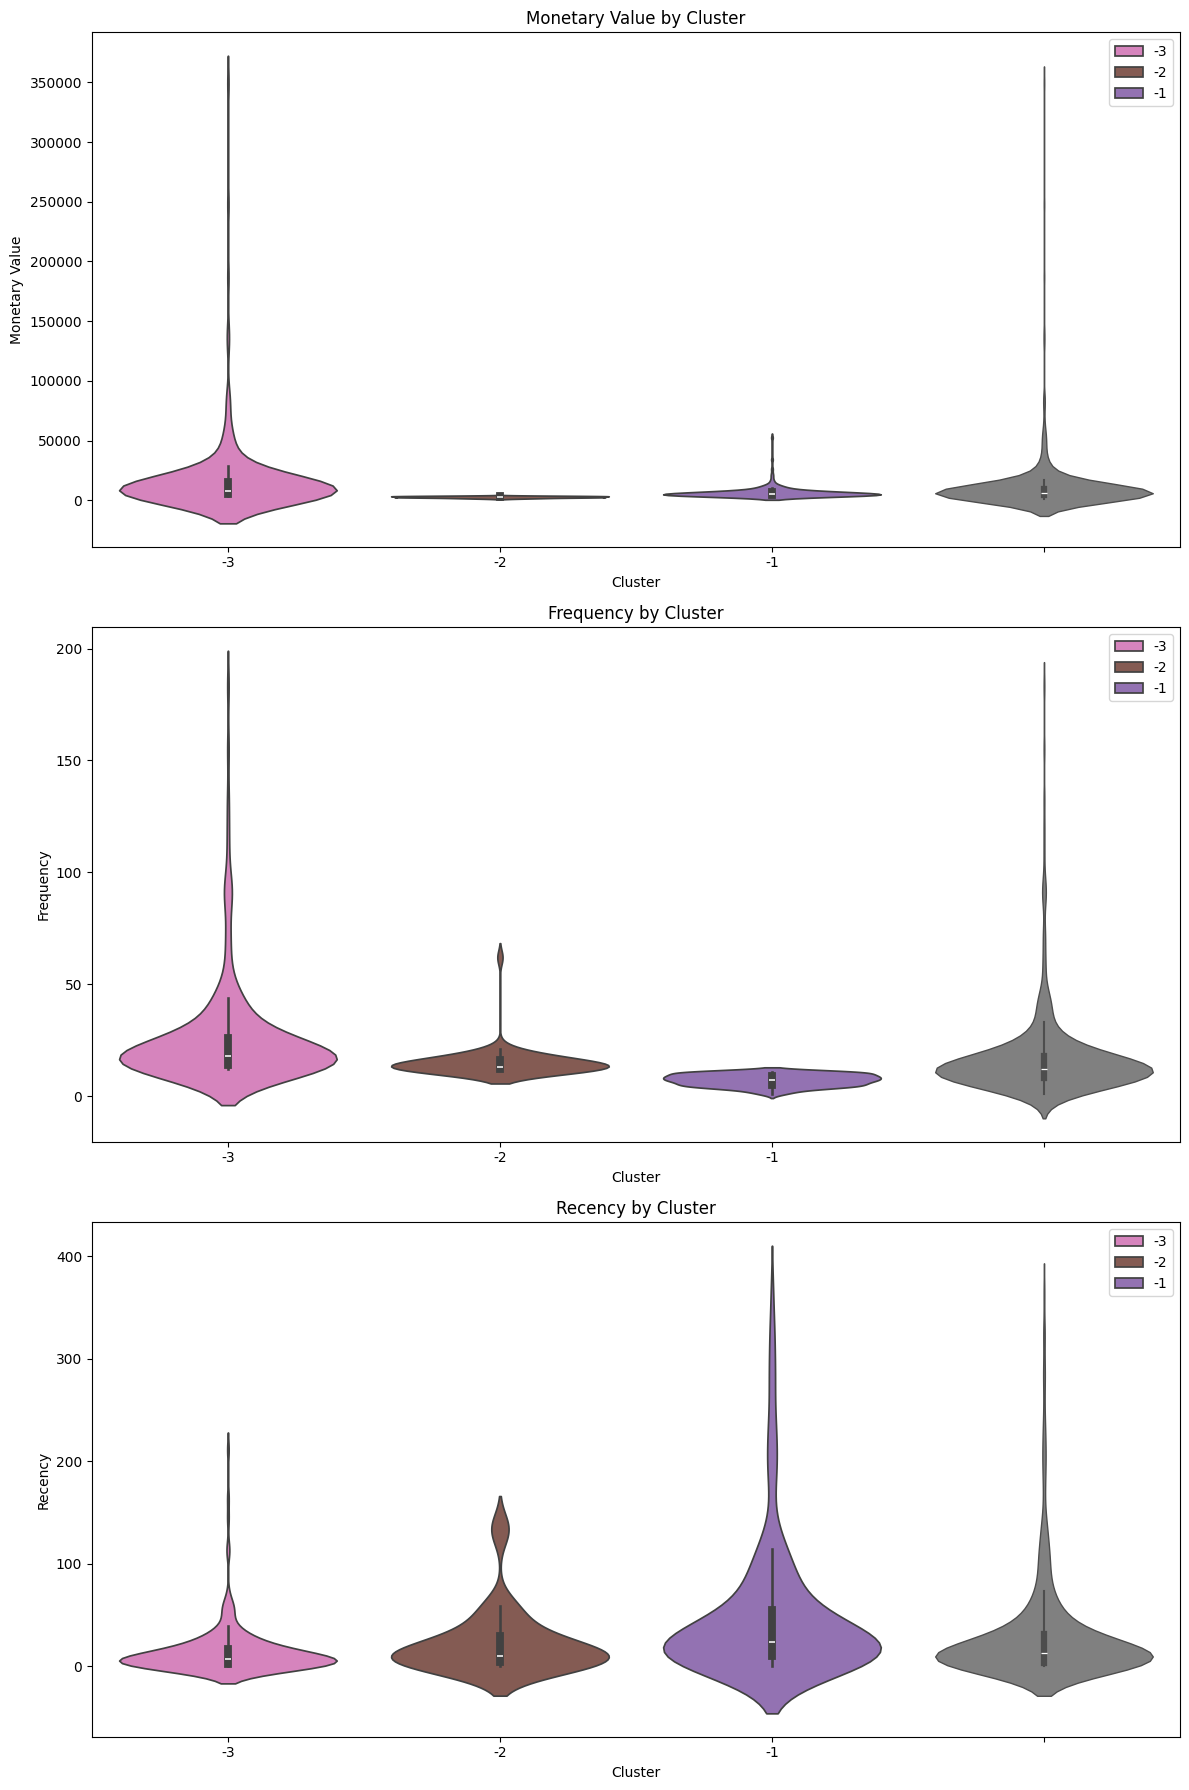

In [82]:
# Again, we must find reasonabe names for the outlier clusters, using violin plots.^
# And again, i copied the graphic code...
cluster_colors = {-1: '#9467bd',
                  -2: '#8c564b',
                  -3: '#e377c2'}

plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['MonetaryValue'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Frequency'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Recency'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

- Cluster -1: High spenders but not frequent buyers. We want these customers to be more active -> find out what they want and give them more than that. Motivate them to be more active.
- Cluster -2: Buy frequently but not spend much. Chances for upsales? Loyalty programm?
- Cluster -3: Love us! Buy frequently and spend a lot. Maintain them!  
  
The next question is how much the cost of actions would be for each cluster. Which actions would bring us more money? We can find the answer by calculating how many customers each cluster has.

In [83]:
# But first, give the clusters real names
cluster_labels = {
    0: "RETAIN",
    1: "RE-ENGAGE",
    2: "NURTURE",
    3: "REWARD",
    -1: "PAMPER",
    -2: "UPSELL",
    -3: "DELIGHT"
}
# and also concat all the clusters together
full_clustering_df = pd.concat([non_outlier_df, outlier_clusters_df])

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoideDate,Recency,Cluster
0,12346.00,169.36,2,2010-06-28 13:53:00,164,1
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.00,221.16,1,2010-09-27 14:59:00,73,2
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,0
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4235,18223.00,7516.31,12,2010-11-17 12:20:00,22,-3
4236,18225.00,7545.14,15,2010-12-09 15:46:00,0,-3
4237,18226.00,6650.83,15,2010-11-26 15:51:00,13,-3
4241,18231.00,4791.80,23,2010-10-29 14:17:00,41,-3


In [84]:
full_clustering_df["ClusterLabel"] = full_clustering_df["Cluster"].map(cluster_labels)

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoideDate,Recency,Cluster,ClusterLabel
0,12346.00,169.36,2,2010-06-28 13:53:00,164,1,RE-ENGAGE
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0,RETAIN
2,12348.00,221.16,1,2010-09-27 14:59:00,73,2,NURTURE
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,0,RETAIN
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2,NURTURE
...,...,...,...,...,...,...,...
4235,18223.00,7516.31,12,2010-11-17 12:20:00,22,-3,DELIGHT
4236,18225.00,7545.14,15,2010-12-09 15:46:00,0,-3,DELIGHT
4237,18226.00,6650.83,15,2010-11-26 15:51:00,13,-3,DELIGHT
4241,18231.00,4791.80,23,2010-10-29 14:17:00,41,-3,DELIGHT


Now we know what to do with EACH customer! Next step is to decide, what to do first.

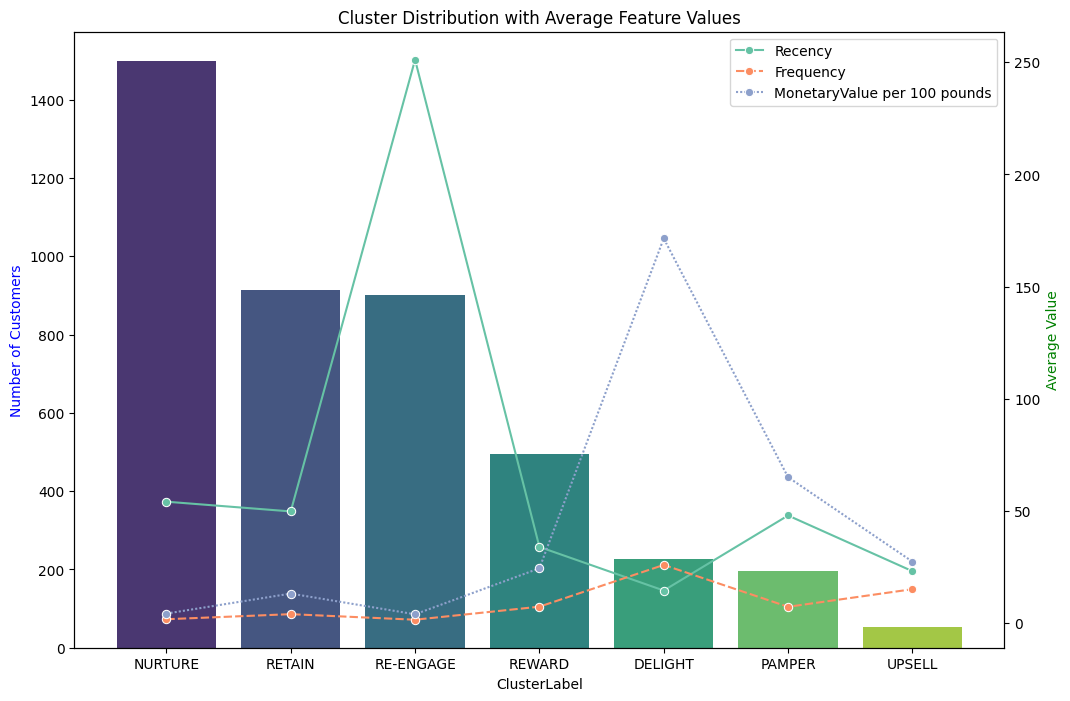

In [85]:
cluster_counts = full_clustering_df['ClusterLabel'].value_counts()
full_clustering_df["MonetaryValue per 100 pounds"] = full_clustering_df["MonetaryValue"] / 100.00
feature_means = full_clustering_df.groupby('ClusterLabel')[['Recency', 'Frequency', 'MonetaryValue per 100 pounds']].mean()

fig, ax1 = plt.subplots(figsize=(12, 8))

sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis', hue=cluster_counts.index)
ax1.set_ylabel('Number of Customers', color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')

ax2 = ax1.twinx()

sns.lineplot(data=feature_means, ax=ax2, palette='Set2', marker='o')
ax2.set_ylabel('Average Value', color='g')

plt.show()

Looking at the nurture cluster, we see that the number of items (customers) is highest here. We could start here. In terms of monetary value, we could also group Delight and Pamper together for a VIP program.  
Actually, talk with sales and upper managers about possible actions, because these must be planed based on capacity and strategy of the company.